In [1]:
import pandas as pd

import xgboost as xgb

In [2]:
df = pd.read_csv('variable_selected_county_dataset.csv', index_col=0)

In [8]:
df

,date,cases,stay_at_home_announced,stay_at_home_effective,total_population,area_sqmi,population_density_per_sqmi,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,...,thunder,tornado,mean_temp_3d_avg,max_temp_3d_avg,min_temp_3d_avg,dewpoint_3d_avg,date_stay_at_home_announced,date_stay_at_home_effective,entity,incremental_cases
190,2020-03-10,20,no,no,10057155.0,4058.183382,2478.240645,16.418669,3.550138,3.616494,...,0.0,0.0,61.366667,67.400000,53.600000,47.000000,2020-03-19,2020-03-19,California-Los Angeles,1.0
201,2020-03-11,28,no,no,10057155.0,4058.183382,2478.240645,16.418669,3.550138,3.616494,...,0.0,0.0,60.666667,66.800000,54.200000,51.566667,2020-03-19,2020-03-19,California-Los Angeles,8.0
213,2020-03-12,32,no,no,10057155.0,4058.183382,2478.240645,16.418669,3.550138,3.616494,...,0.0,0.0,57.033333,62.600000,52.400000,50.833333,2020-03-19,2020-03-19,California-Los Angeles,4.0
225,2020-03-13,40,no,no,10057155.0,4058.183382,2478.240645,16.418669,3.550138,3.616494,...,0.0,0.0,53.933333,58.400000,50.600000,50.800000,2020-03-19,2020-03-19,California-Los Angeles,8.0
237,2020-03-14,53,no,no,10057155.0,4058.183382,2478.240645,16.418669,3.550138,3.616494,...,0.0,0.0,53.400000,55.400000,51.800000,48.866667,2020-03-19,2020-03-19,California-Los Angeles,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,2020-11-30,100650,yes,yes,1947529.0,863.649681,2254.998805,19.945542,3.633687,3.878487,...,0.0,0.0,42.966667,52.633333,33.333333,29.666667,2020-03-31,2020-04-02,Texas-Tarrant,3356.0
3392,2020-12-01,102051,yes,yes,1947529.0,863.649681,2254.998805,19.945542,3.633687,3.878487,...,0.0,0.0,43.166667,54.300000,32.666667,26.733333,2020-03-31,2020-04-02,Texas-Tarrant,1401.0
3404,2020-12-02,103781,yes,yes,1947529.0,863.649681,2254.998805,19.945542,3.633687,3.878487,...,0.0,0.0,43.133333,53.266667,34.366667,30.100000,2020-03-31,2020-04-02,Texas-Tarrant,1730.0
3416,2020-12-03,105675,yes,yes,1947529.0,863.649681,2254.998805,19.945542,3.633687,3.878487,...,0.0,0.0,42.400000,47.633333,36.700000,33.633333,2020-03-31,2020-04-02,Texas-Tarrant,1894.0


In [7]:
dfToUse = df.drop(labels=['cases'],axis=1)
dfToUse = dfToUse[dfToUse['entity'] == 'Florida-Miami-Dade']

In [8]:
dfToUse

,date,stay_at_home_announced,stay_at_home_effective,total_population,area_sqmi,population_density_per_sqmi,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,...,thunder,tornado,mean_temp_3d_avg,max_temp_3d_avg,min_temp_3d_avg,dewpoint_3d_avg,date_stay_at_home_announced,date_stay_at_home_effective,entity,incremental_cases
3429,2020-03-10,no,no,2664418.0,1898.662311,1403.313262,23.64807,4.0353,4.22856,8.522714,...,0.0,0.0,73.266667,82.333333,64.666667,62.800000,2020-04-01,2020-04-03,Florida-Miami-Dade,1.0
204,2020-03-11,no,no,2664418.0,1898.662311,1403.313262,23.64807,4.0353,4.22856,8.522714,...,0.0,0.0,73.266667,82.333333,64.666667,62.800000,2020-04-01,2020-04-03,Florida-Miami-Dade,0.0
216,2020-03-12,no,no,2664418.0,1898.662311,1403.313262,23.64807,4.0353,4.22856,8.522714,...,0.0,0.0,73.033333,83.333333,63.333333,63.666667,2020-04-01,2020-04-03,Florida-Miami-Dade,1.0
228,2020-03-13,no,no,2664418.0,1898.662311,1403.313262,23.64807,4.0353,4.22856,8.522714,...,0.0,0.0,73.700000,84.000000,63.333333,65.233333,2020-04-01,2020-04-03,Florida-Miami-Dade,6.0
240,2020-03-14,no,no,2664418.0,1898.662311,1403.313262,23.64807,4.0353,4.22856,8.522714,...,0.0,0.0,74.666667,84.000000,64.633333,66.566667,2020-04-01,2020-04-03,Florida-Miami-Dade,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3372,2020-11-30,yes,yes,2664418.0,1898.662311,1403.313262,23.64807,4.0353,4.22856,8.522714,...,1.0,0.0,NaN,NaN,NaN,NaN,2020-04-01,2020-04-03,Florida-Miami-Dade,1962.0
3384,2020-12-01,yes,yes,2664418.0,1898.662311,1403.313262,23.64807,4.0353,4.22856,8.522714,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-01,2020-04-03,Florida-Miami-Dade,2143.0
3396,2020-12-02,yes,yes,2664418.0,1898.662311,1403.313262,23.64807,4.0353,4.22856,8.522714,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-01,2020-04-03,Florida-Miami-Dade,2293.0
3408,2020-12-03,yes,yes,2664418.0,1898.662311,1403.313262,23.64807,4.0353,4.22856,8.522714,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-01,2020-04-03,Florida-Miami-Dade,2254.0


In [9]:
toDrop = dfToUse.columns[dfToUse.nunique() == 1].tolist()
toDrop.pop()
dfToUse.drop(labels=toDrop, axis=1, inplace=True)

In [10]:
train = dfToUse[dfToUse['date'] < '2020-10-26'].sort_values(by=['date']).reset_index().drop(labels=['index'],axis=1)
test = dfToUse[dfToUse['date'] >= '2020-10-26']
train.date = pd.to_datetime(train.date)
train['month'] = train.date.dt.month
train['day'] = train.date.dt.day

test.date = pd.to_datetime(test.date)
test['month'] = test.date.dt.month
test['day'] = test.date.dt.day

C:\Users\Albert Song\AppData\Local\Temp\ipykernel_27844\3474772313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.date = pd.to_datetime(test.date)
C:\Users\Albert Song\AppData\Local\Temp\ipykernel_27844\3474772313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['month'] = test.date.dt.month
C:\Users\Albert Song\AppData\Local\Temp\ipykernel_27844\3474772313.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [11]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

#train.reset_index(inplace=True)

n_splits = 3

tscv = TimeSeriesSplit(n_splits=n_splits)

In [12]:
yTrain = train['incremental_cases']
xTrain = train.drop(labels=['incremental_cases', 'date'],axis=1)


In [13]:
finalXTrain = pd.get_dummies(xTrain)

In [14]:
nEst = [2500, 5000, 7500]
lr = [0.001,0.1,0.5]
md = [4,6,8]
ss = [0.1,0.5,0.8]
rl = [0,1]
gam = [0,0.1,1]
best_score, best_cfg = float("inf"), None
for n in nEst:
    for l in lr:
        for m in md:
            for s in ss:
                for r in rl:
                    for g in gam:
                        eval = (n,l,m,s,r,g)
                        avg = 0
                        print(eval)
                        for train_index, val_index in tscv.split(finalXTrain):
                            train_data, val_data = finalXTrain.loc[train_index], finalXTrain.loc[val_index]
                            yFit = yTrain.loc[train_index]
                            yVal = yTrain.loc[val_index]
                            model = xgb.XGBRegressor(n_estimators=n, learning_rate=l, max_depth=m, subsample=s, reg_lambda=r, gamma=g)
                            model.fit(train_data, yFit)
                            forecast = model.predict(val_data)
                            mse = mean_squared_error(yVal, forecast)
                            avg += mse
                        if avg < best_score:
                            best_score, best_cfg = avg, eval

(2500, 0.001, 4, 0.1, 0, 0)
(2500, 0.001, 4, 0.1, 0, 0.1)
(2500, 0.001, 4, 0.1, 0, 1)
(2500, 0.001, 4, 0.1, 1, 0)
(2500, 0.001, 4, 0.1, 1, 0.1)
(2500, 0.001, 4, 0.1, 1, 1)
(2500, 0.001, 4, 0.5, 0, 0)
(2500, 0.001, 4, 0.5, 0, 0.1)
(2500, 0.001, 4, 0.5, 0, 1)
(2500, 0.001, 4, 0.5, 1, 0)
(2500, 0.001, 4, 0.5, 1, 0.1)
(2500, 0.001, 4, 0.5, 1, 1)
(2500, 0.001, 4, 0.8, 0, 0)
(2500, 0.001, 4, 0.8, 0, 0.1)
(2500, 0.001, 4, 0.8, 0, 1)
(2500, 0.001, 4, 0.8, 1, 0)
(2500, 0.001, 4, 0.8, 1, 0.1)
(2500, 0.001, 4, 0.8, 1, 1)
(2500, 0.001, 6, 0.1, 0, 0)
(2500, 0.001, 6, 0.1, 0, 0.1)
(2500, 0.001, 6, 0.1, 0, 1)
(2500, 0.001, 6, 0.1, 1, 0)
(2500, 0.001, 6, 0.1, 1, 0.1)
(2500, 0.001, 6, 0.1, 1, 1)
(2500, 0.001, 6, 0.5, 0, 0)
(2500, 0.001, 6, 0.5, 0, 0.1)
(2500, 0.001, 6, 0.5, 0, 1)
(2500, 0.001, 6, 0.5, 1, 0)
(2500, 0.001, 6, 0.5, 1, 0.1)
(2500, 0.001, 6, 0.5, 1, 1)
(2500, 0.001, 6, 0.8, 0, 0)
(2500, 0.001, 6, 0.8, 0, 0.1)
(2500, 0.001, 6, 0.8, 0, 1)
(2500, 0.001, 6, 0.8, 1, 0)
(2500, 0.001, 6, 0.8, 1, 0

In [15]:
print(best_score, best_cfg)

3045101.1130451 (7500, 0.5, 8, 0.8, 0, 1)


In [16]:
nEst = [7500,10000]
lr = [0.5,0.3,0.8]
md = [8,10,12]
ss = [0.7,0.8,0.9]
rl = [0,0.1]
gam = [1]
best_score, best_cfg = float("inf"), None
for n in nEst:
    for l in lr:
        for m in md:
            for s in ss:
                for r in rl:
                    for g in gam:
                        eval = (n,l,m,s,r,g)
                        avg = 0
                        print(eval)
                        for train_index, val_index in tscv.split(finalXTrain):
                            train_data, val_data = finalXTrain.loc[train_index], finalXTrain.loc[val_index]
                            yFit = yTrain.loc[train_index]
                            yVal = yTrain.loc[val_index]
                            model = xgb.XGBRegressor(n_estimators=n, learning_rate=l, max_depth=m, subsample=s, reg_lambda=r, gamma=g)
                            model.fit(train_data, yFit)
                            forecast = model.predict(val_data)
                            mse = mean_squared_error(yVal, forecast)
                            avg += mse
                        if avg < best_score:
                            best_score, best_cfg = avg, eval

(7500, 0.5, 8, 0.7, 0, 1)
(7500, 0.5, 8, 0.7, 0.1, 1)
(7500, 0.5, 8, 0.8, 0, 1)
(7500, 0.5, 8, 0.8, 0.1, 1)
(7500, 0.5, 8, 0.9, 0, 1)
(7500, 0.5, 8, 0.9, 0.1, 1)
(7500, 0.5, 10, 0.7, 0, 1)
(7500, 0.5, 10, 0.7, 0.1, 1)
(7500, 0.5, 10, 0.8, 0, 1)
(7500, 0.5, 10, 0.8, 0.1, 1)
(7500, 0.5, 10, 0.9, 0, 1)
(7500, 0.5, 10, 0.9, 0.1, 1)
(7500, 0.5, 12, 0.7, 0, 1)
(7500, 0.5, 12, 0.7, 0.1, 1)
(7500, 0.5, 12, 0.8, 0, 1)
(7500, 0.5, 12, 0.8, 0.1, 1)
(7500, 0.5, 12, 0.9, 0, 1)
(7500, 0.5, 12, 0.9, 0.1, 1)
(7500, 0.3, 8, 0.7, 0, 1)
(7500, 0.3, 8, 0.7, 0.1, 1)
(7500, 0.3, 8, 0.8, 0, 1)
(7500, 0.3, 8, 0.8, 0.1, 1)
(7500, 0.3, 8, 0.9, 0, 1)
(7500, 0.3, 8, 0.9, 0.1, 1)
(7500, 0.3, 10, 0.7, 0, 1)
(7500, 0.3, 10, 0.7, 0.1, 1)
(7500, 0.3, 10, 0.8, 0, 1)
(7500, 0.3, 10, 0.8, 0.1, 1)
(7500, 0.3, 10, 0.9, 0, 1)
(7500, 0.3, 10, 0.9, 0.1, 1)
(7500, 0.3, 12, 0.7, 0, 1)
(7500, 0.3, 12, 0.7, 0.1, 1)
(7500, 0.3, 12, 0.8, 0, 1)
(7500, 0.3, 12, 0.8, 0.1, 1)
(7500, 0.3, 12, 0.9, 0, 1)
(7500, 0.3, 12, 0.9, 0.1, 1)
(750

In [18]:
nEst = [10000,15000]
lr = [0.5]
md = [12,14,16]
ss = [0.8]
rl = [0.01,0.1,0.2]
gam = [1]
best_score, best_cfg = float("inf"), None
for n in nEst:
    for l in lr:
        for m in md:
            for s in ss:
                for r in rl:
                    for g in gam:
                        eval = (n,l,m,s,r,g)
                        avg = 0
                        print(eval)
                        for train_index, val_index in tscv.split(finalXTrain):
                            train_data, val_data = finalXTrain.loc[train_index], finalXTrain.loc[val_index]
                            yFit = yTrain.loc[train_index]
                            yVal = yTrain.loc[val_index]
                            model = xgb.XGBRegressor(n_estimators=n, learning_rate=l, max_depth=m, subsample=s, reg_lambda=r, gamma=g)
                            model.fit(train_data, yFit)
                            forecast = model.predict(val_data)
                            mse = mean_squared_error(yVal, forecast)
                            avg += mse
                        if avg < best_score:
                            best_score, best_cfg = avg, eval

(10000, 0.5, 12, 0.8, 0.01, 1)
(10000, 0.5, 12, 0.8, 0.1, 1)
(10000, 0.5, 12, 0.8, 0.2, 1)
(10000, 0.5, 14, 0.8, 0.01, 1)
(10000, 0.5, 14, 0.8, 0.1, 1)
(10000, 0.5, 14, 0.8, 0.2, 1)
(10000, 0.5, 16, 0.8, 0.01, 1)
(10000, 0.5, 16, 0.8, 0.1, 1)
(10000, 0.5, 16, 0.8, 0.2, 1)
(15000, 0.5, 12, 0.8, 0.01, 1)
(15000, 0.5, 12, 0.8, 0.1, 1)
(15000, 0.5, 12, 0.8, 0.2, 1)
(15000, 0.5, 14, 0.8, 0.01, 1)
(15000, 0.5, 14, 0.8, 0.1, 1)
(15000, 0.5, 14, 0.8, 0.2, 1)
(15000, 0.5, 16, 0.8, 0.01, 1)
(15000, 0.5, 16, 0.8, 0.1, 1)
(15000, 0.5, 16, 0.8, 0.2, 1)


In [20]:
nEst = [15000,20000]
lr = [0.5]
md = [12,14,16]
ss = [0.8]
rl = [0.1,0.2,0.5]
gam = [1]
best_score, best_cfg = float("inf"), None
for n in nEst:
    for l in lr:
        for m in md:
            for s in ss:
                for r in rl:
                    for g in gam:
                        eval = (n,l,m,s,r,g)
                        avg = 0
                        print(eval)
                        for train_index, val_index in tscv.split(finalXTrain):
                            train_data, val_data = finalXTrain.loc[train_index], finalXTrain.loc[val_index]
                            yFit = yTrain.loc[train_index]
                            yVal = yTrain.loc[val_index]
                            model = xgb.XGBRegressor(n_estimators=n, learning_rate=l, max_depth=m, subsample=s, reg_lambda=r, gamma=g)
                            model.fit(train_data, yFit)
                            forecast = model.predict(val_data)
                            mse = mean_squared_error(yVal, forecast)
                            avg += mse
                        if avg < best_score:
                            best_score, best_cfg = avg, eval

(15000, 0.5, 12, 0.8, 0.1, 1)
(15000, 0.5, 12, 0.8, 0.2, 1)
(15000, 0.5, 12, 0.8, 0.5, 1)
(15000, 0.5, 14, 0.8, 0.1, 1)
(15000, 0.5, 14, 0.8, 0.2, 1)
(15000, 0.5, 14, 0.8, 0.5, 1)
(15000, 0.5, 16, 0.8, 0.1, 1)
(15000, 0.5, 16, 0.8, 0.2, 1)
(15000, 0.5, 16, 0.8, 0.5, 1)
(20000, 0.5, 12, 0.8, 0.1, 1)
(20000, 0.5, 12, 0.8, 0.2, 1)
(20000, 0.5, 12, 0.8, 0.5, 1)
(20000, 0.5, 14, 0.8, 0.1, 1)
(20000, 0.5, 14, 0.8, 0.2, 1)
(20000, 0.5, 14, 0.8, 0.5, 1)
(20000, 0.5, 16, 0.8, 0.1, 1)
(20000, 0.5, 16, 0.8, 0.2, 1)
(20000, 0.5, 16, 0.8, 0.5, 1)


In [21]:
print(best_score, best_cfg)

2572975.747804057 (15000, 0.5, 12, 0.8, 0.2, 1)


In [31]:
model = xgb.XGBRegressor(n_estimators=15000, learning_rate=0.5, max_depth=12, subsample=0.8, reg_lambda=0.2, gamma=1)

model.fit(finalXTrain, yTrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=15000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
yTest = test[['incremental_cases', 'entity', 'date']]
xTest = test.drop(labels=['incremental_cases', 'date'],axis=1)
xTest = pd.get_dummies(xTest)
xTest['stay_at_home_announced_no'] = False
xTest['stay_at_home_effective_no'] = False
xTest['precip_flag_A'] = False
xTest['precip_flag_I'] = False
xTest['precip_flag_B'] = False
xTest = xTest[finalXTrain.columns]

In [25]:
xTest

,mean_temp,min_temp,max_temp,dewpoint,sea_level_pressure,station_pressure,visibility,wind_speed,max_wind_speed,precipitation,...,month,day,stay_at_home_announced_no,stay_at_home_announced_yes,stay_at_home_effective_no,stay_at_home_effective_yes,precip_flag_B,precip_flag_G,precip_flag_I,entity_Florida-Miami-Dade
2952,80.1,73.0,88.0,77.0,1014.1,13.8,9.5,7.4,14.0,0.08,...,10,26,False,True,False,True,False,True,False,True
2964,82.1,73.9,88.0,76.9,1016.7,16.5,10.0,9.5,15.9,0.21,...,10,27,False,True,False,True,False,True,False,True
2976,81.9,77.0,88.0,77.0,1016.1,16.0,9.7,9.0,15.9,0.00,...,10,28,False,True,False,True,False,True,False,True
2988,83.2,78.1,89.1,77.0,1014.0,13.8,10.0,7.1,9.9,0.03,...,10,29,False,True,False,True,False,True,False,True
3000,80.9,73.9,89.1,76.3,1013.8,13.5,9.4,2.4,8.9,0.00,...,10,30,False,True,False,True,False,True,False,True
3012,79.3,73.9,89.1,75.8,1016.5,16.2,10.0,5.2,9.9,0.01,...,10,31,False,True,False,True,False,True,False,True
3024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11,1,False,True,False,True,False,False,False,True
3036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,False,True,False,True,False,False,False,True
3048,78.6,75.0,90.0,61.1,1019.1,19.0,10.0,16.3,21.0,0.00,...,11,3,False,True,False,True,False,True,False,True
3060,76.7,73.0,82.9,64.8,1020.0,19.7,10.0,13.6,25.1,0.00,...,11,4,False,True,False,True,False,True,False,True


In [32]:
preds = model.predict(xTest)

In [33]:
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_absolute_percentage_error(preds, yTest.incremental_cases)
mse

1.6029736938765982

In [38]:
model = xgb.XGBRegressor()

model.fit(finalXTrain, yTrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
preds = model.predict(xTest)

In [40]:
mse = mean_absolute_percentage_error(preds, yTest.incremental_cases)
mse

1.4648417215586202

In [29]:
yTest['preds'] = preds

C:\Users\Albert Song\AppData\Local\Temp\ipykernel_27844\4113693813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yTest['preds'] = preds


In [34]:
yTest

,incremental_cases,entity,date,preds
2953,1879.0,Illinois-Cook,2020-10-26,840.068237
2965,1367.0,Illinois-Cook,2020-10-27,873.845337
2977,2276.0,Illinois-Cook,2020-10-28,961.321655
2989,2541.0,Illinois-Cook,2020-10-29,1073.308960
3001,2756.0,Illinois-Cook,2020-10-30,945.408813
3013,0.0,Illinois-Cook,2020-10-31,958.149170
3025,6697.0,Illinois-Cook,2020-11-01,1038.314575
3037,2638.0,Illinois-Cook,2020-11-02,928.910767
3049,2444.0,Illinois-Cook,2020-11-03,1209.949829
3061,2992.0,Illinois-Cook,2020-11-04,1014.162903


In [16]:
yTest

,incremental_cases,entity,date
2953,1879.0,Illinois-Cook,2020-10-26
2965,1367.0,Illinois-Cook,2020-10-27
2977,2276.0,Illinois-Cook,2020-10-28
2989,2541.0,Illinois-Cook,2020-10-29
3001,2756.0,Illinois-Cook,2020-10-30
3013,0.0,Illinois-Cook,2020-10-31
3025,6697.0,Illinois-Cook,2020-11-01
3037,2638.0,Illinois-Cook,2020-11-02
3049,2444.0,Illinois-Cook,2020-11-03
3061,2992.0,Illinois-Cook,2020-11-04


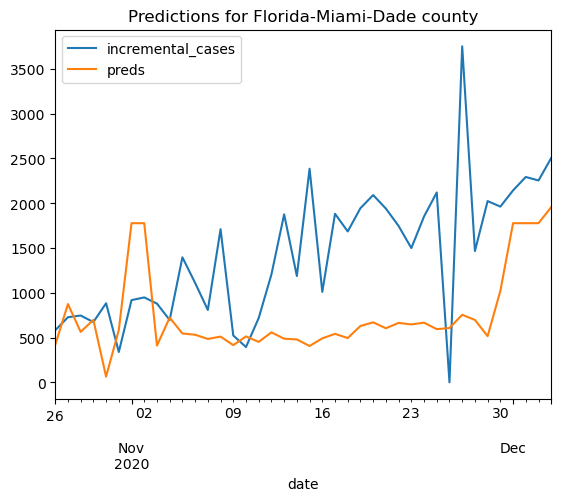

In [30]:
for x in yTest.entity.unique():
    dfPlot = yTest[yTest['entity'] == x].drop(labels=['entity'], axis=1)
    dfPlot.plot(x='date', title=str('Predictions for ' + x + ' county'))